We need GPU for it, else it will be time consuming. So we go to "Runtime" option of Colab and Change Runtime Type to GPU. Then we check if it's enabled.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## How to Download Data from Kaggle.
Keep this section saved anywhere else as you will need to do these steps again and again in future. 

First we mount drive, so that we can have access to Drive files to use it in Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Now approach step by step:
Go to **path** where you want to download the dataset in your drive. Mine is:


In [3]:
% cd /content/drive/My Drive/Colab_Notebooks/dog-cat

/content/drive/My Drive/Colab_Notebooks/dog-cat


Take your Token from Kaggle. For this:
   - Go to **My Account** (Not My Profile)
   - Go to **API** Section and click on **Create New API Token**
   - Download the token, which will be saved as a **.json file** (e.g. **kaggle.json**)

Use this code to upload API Token from Kaggle:

In [4]:
from google.colab import files
files.upload()

Run this 4 lines of code

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

Go to your desired **Dataset page** of Kaggle. **Agree with the terms** and then **copy the API Command**.

(Note: Give "!" before kaggle). e.g.:

In [6]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

There you go! Your dataset starts downloading and you will find it in your drive directory that you mentioned earlier.

To unzip files:

In [7]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/Colab_Notebooks/dog-cat/dogs-vs-cats.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

# 5.2
## Separation of data
Now our work begins! We won't work with entire dataset, rather first 2000 images of cats and dogs each from train folder.

In [8]:
import os, shutil
# our dataset (only train portion)
original_dataset_dir = "/content/drive/My Drive/Colab_Notebooks/dog-cat/train/train"    # we are asked to work with train part only.
# Directory where you’ll store your smaller dataset
base_dir = "/content/drive/My Drive/Colab_Notebooks/dog-cat-small"
os.mkdir(base_dir)


In [9]:
# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [11]:
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [12]:
# now same work for validation and test sets
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
# now same work for dog pictures

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# sanity check
import pandas as pd
d = {
        "Set": ["Train","", "Validation","", "Test",""],
        "Type": ["Cats", "Dogs", "Cats", "Dogs", "Cats", "Dogs"],
        "Number": [len(os.listdir(train_cats_dir)),
                    len(os.listdir(train_dogs_dir)),
                    len(os.listdir(validation_cats_dir)),
                    len(os.listdir(validation_dogs_dir)),
                    len(os.listdir(test_cats_dir)),
                    len(os.listdir(test_dogs_dir))]
    }

p = pd.DataFrame(d)
p

,Set,Type,Number
0,Train,Cats,1000
1,,Dogs,1000
2,Validation,Cats,500
3,,Dogs,500
4,Test,Cats,500
5,,Dogs,500


## A Small convnet

In [18]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#### Configure the Model for Training

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

## Data Preprocessing
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as we know, neural networks prefer to deal with small input values).

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary') #Because we use binary_crossentropy loss, we need binary labels.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Fit the model

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
#it took 1hour to train in my pc

Epoch 1/30
100/100 [==============================] - 836s 8s/step - loss: 0.6936 - acc: 0.5395 - val_loss: 0.6760 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6611 - acc: 0.6160 - val_loss: 0.6392 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6077 - acc: 0.6785 - val_loss: 0.6223 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5660 - acc: 0.7100 - val_loss: 0.6560 - val_acc: 0.6290
Epoch 5/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5407 - acc: 0.7300 - val_loss: 0.6233 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5015 - acc: 0.7485 - val_loss: 0.5722 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4808 - acc: 0.7685 - val_loss: 0.5810 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 11s

In [24]:
#### Save the model for future use:
model.save('cats_and_dogs_small_1.h5')

### Evaluation

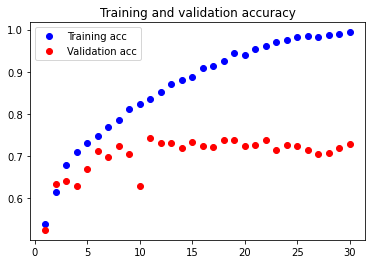

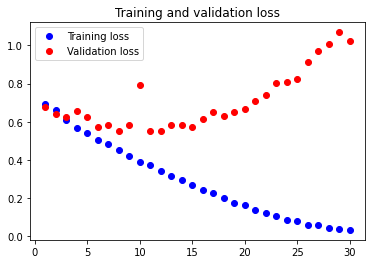

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of **overfitting**. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.<br>
For a small dataset with images, we can fight this generating more images with flip/ rotate/ translate etc. 

## Data Augmentation

In [26]:
datagen = ImageDataGenerator(
    rotation_range=40,      # value in degree
    width_shift_range=0.2,  # range for randomly translate pic
    height_shift_range=0.2,
    shear_range=0.2,        # random shearing transform
    zoom_range=0.2,         # zooming inside
    horizontal_flip=True,   # random flip half the image horiz.
    fill_mode='nearest')    # filling in newly created px

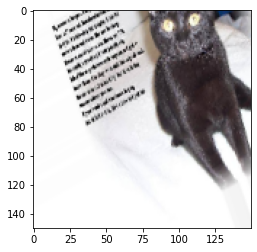

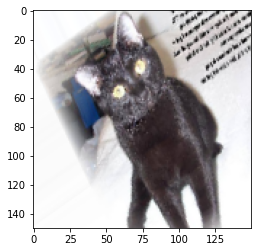

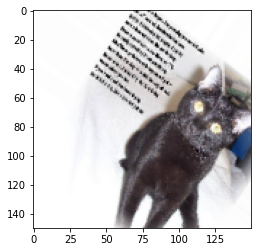

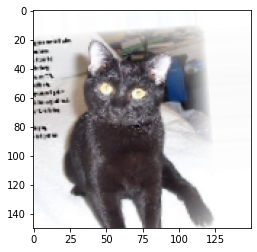

In [27]:
# have a watch over agumented pix
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]    # img to augment

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # Converts to np array of (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshape to (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### A new ConvNet including Dropout
to fight further overfitting

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

### Now train model again

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
# it would take about 3.5hours. Because #epochs is more (100)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6915 - acc: 0.5210 - val_loss: 0.7346 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6844 - acc: 0.5540 - val_loss: 0.6887 - val_acc: 0.5070
Epoch 3/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6768 - acc: 0.5615 - val_loss: 0.6563 - val_acc: 0.5940
Epoch 4/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6677 - acc: 0.5875 - val_loss: 0.6546 - val_acc: 0.5990
Epoch 5/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6447 - acc: 0.6250 - val_loss: 0.6477 - val_acc: 0.6030
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6298 - acc: 0.6395 - val_loss: 0.6015 - val_acc: 0.6680
Epoch 7/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6123 - acc: 0.6545 -

In [30]:
# save for future use
model.save('cats_and_dogs_small_2.h5')

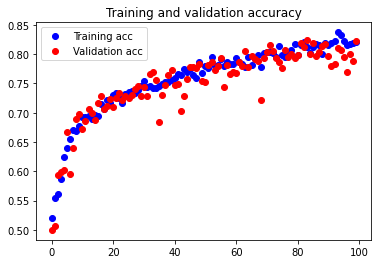

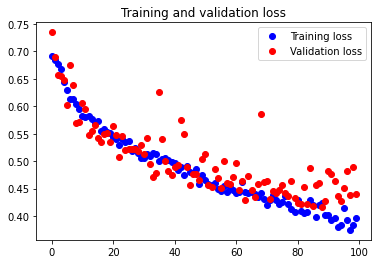

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now both train and validation are together. Better, isn't it?<br>In the next notebook, we will be working with Pre Trained Model with Feature Extraction and Fine Tuning.